# Exporting Graphs and Visualization with NetworkX

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# Create the GraphiPy object
graphipy = GraphiPy()

# The reddit API needs these credentials
CLIENT_ID = ""
CLIENT_SECRET = ""
USER_AGENT = ""
USERNAME = ""
PASSWORD = ""

# To get the credentials, login to Reddit and go to https://www.reddit.com/prefs/apps/ 
# and click on the create an app buttonn

reddit_api_credentials = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "user_agent": USER_AGENT,
    "username": USERNAME,
    "password": PASSWORD
}

# Create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

In [3]:
# For this demo we will be looking at submission 9uolpb's comments
submission_id = "9uolpb"

# Dictionary Graph

In [4]:
gp_dict = graphipy.create_graph("dictionary")
gp_dict = reddit.fetch_submission_comments(gp_dict, submission_id, limit=8)

# Pandas Graph

In [5]:
gp_pd = graphipy.create_graph("pandas")
gp_pd = reddit.fetch_submission_comments(gp_pd, submission_id, limit=8)

# Neo4j Graph

In [6]:
neo4j_auth = ""
gp_neo = graphipy.create_graph("neo4j", neo4j_auth)
gp_neo = reddit.fetch_submission_comments(gp_neo, submission_id, limit=8)

# NetworkX Visualization

In [7]:
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

# Creating the NetworkX Graph

### def create_from_[GRAPH_TYPE\](nodes, edges, nx_graph=None, directional=False)

The NetworkX Exporter object provides the functions to create a NetworkX Graph from dictionary, pandas, and Neo4j. Replace GRAPH_TYPE with dict for dictionary, pd for pandas, and neo4j for Neo4j.
The function will need 2 arguments, the first one being the nodes and the second one being the edges of the corresponding graph.

The function also takes in 2 optional arguments, nx_graph (NetworkX Graph) and directional (boolean):
- If nx_graph is provided, it will add the passed in nodes and edges to nx_graph.

- The directional parameter will only affect the function if nx_graph is also provided. If directional is set to True (default False), then nx_graph will create a Directional Graph. However, please do note that due to NetworkX's limitations, some edges may overlap each other.

In [8]:
# Set up networkx exporter
exporter = graphipy.get_nx_exporter()

In [9]:
# Create graph from dictionaries
d_nodes = gp_dict.get_nodes()
d_edges = gp_dict.get_edges()
nx_dict = exporter.create_from_dict(d_nodes, d_edges)

In [10]:
# Create graph from pandas
pd_nodes = gp_pd.get_nodes()
pd_edges = gp_pd.get_edges()
nx_pd = exporter.create_from_pd(pd_nodes, pd_edges)

In [11]:
# Create graph from neo4j
neo_nodes = gp_neo.get_nodes()
neo_edges = gp_neo.get_edges()
nx_neo = exporter.create_from_neo4j(neo_nodes, neo_edges)

# Drawing the NetworkX Graph

### def draw_random(nx_graph, pos=None, options=None, legend=None)

The draw_random() function will draw the NetworkX graph with random colors (color_set will have to be provided otherwise the colors will be uniform). It requires a NetworkX Graph object to be passed as the first argument.

The function also has three optional parameters that will affect how the resulting image looks:
- pos is the layout of the graph (see [this page](https://networkx.github.io/documentation/networkx-1.9/reference/drawing.html#module-networkx.drawing.layout) for more information) and defaults to spring_layout
- legend (takes in matplotlib.pyplot) will show color mappings of the nodes and edges if provided
- options will affects the graph's colors and labels
    - node_label will set the nodes' label to the provided attribute if it exists.
    - edge_label will set the edges' label to the provided attribute if it exists.
    - color_set is the list of colors for the function to choose from. Do note that the number of colors provided in the color_set will need to be greater than or equal to the maximum number of nodes/edges. If color_set is not provided, all the nodes will be colored red.
    - colorful_edges (default False), if set to True, will draw different edge categories with different colors. If it is set to False, or if color_set is not provided, the edges color will default to black.

In [12]:
# Set up options
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}

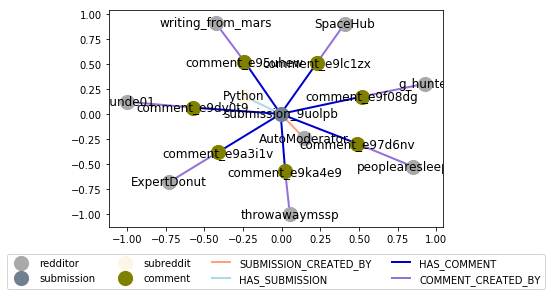

In [13]:
# Draw the dictionary graph
dict_legend = exporter.draw_random(nx_dict, options=options, legend=plt)

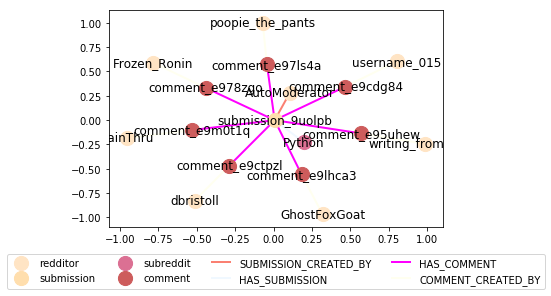

In [14]:
# Draw the pandas graph
pd_legend = exporter.draw_random(nx_pd, options=options, legend=plt)

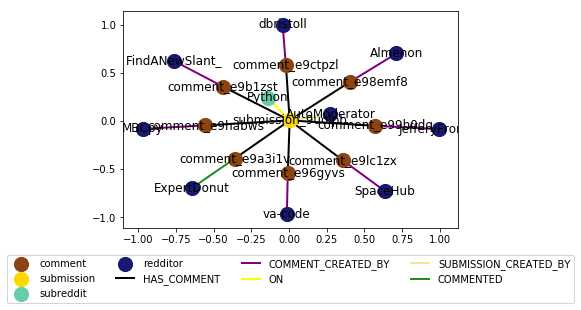

In [15]:
# Draw the neo4j graph
neo_legend = exporter.draw_random(nx_neo, options=options, legend=plt)

# Exporting Graphs as CSV Files

### def export_all_csv(prefix)

export_all_csv() returns the path to where the files are exported to

The function will create the following folder structure if the folders do not exist and write the CSV files inside the corresponding folders:
- csv
    - [prefix]
        - nodes
        - edges

Where [prefix] is what's passed to the function.

The function will then return the path from root to [prefix] (e.g. C:/Users/YOUR_NAME/Documents/csv/[prefix]/)

In [16]:
# export_all_csv returns the path to where the files are exported to
dictionary_path = gp_dict.export_all_csv("dictionary")
pandas_path = gp_pd.export_all_csv("pandas")
neo4j_path = gp_neo.export_all_csv("neo4j")

# Using CSV Files with NetworkX

### def create_from_csv(self, filepath, nx_graph=None, directional=False)

This function is similar to the create_from_[GRAPH_TYPE], but instead of nodes and edges, it will need the path to the folder containing the nodes and edges.

However, the folder structure is very specific and the function will not work if the folder structure is wrong.

The folder structure should be like the following:

- parent_folder
    - nodes
    - edges
    
To use create_from_csv(), provide the path to the parent_folder (e.g. C:/Users/YOUR_NAME/Documents/parent_folder/).

The NetworkX Exporter export function automatically generates the folder structure above and returns the path to the parent folder so you can just pass in the value returned to create_from_csv().

In [17]:
# Provide path to CSV files
# The function needs the path to the nodes and edges folder's parent
# For example, let's say you have the following folder structure:
#    my_folder-----nodes
#               |--edges
# Then you should provide the path to my_folder (e.g. C:/Documents/GraphiPy/my_folder/)

nx_dict_csv = exporter.create_from_csv(dictionary_path)
nx_pd_csv = exporter.create_from_csv(pandas_path)
nx_neo_csv = exporter.create_from_csv(neo4j_path)

# NetworkX Visualization

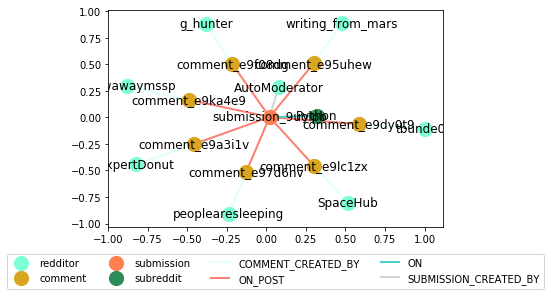

In [18]:
# Draw dictionary graph
nx_dict_legend = exporter.draw_random(nx_dict_csv, options=options, legend=plt)

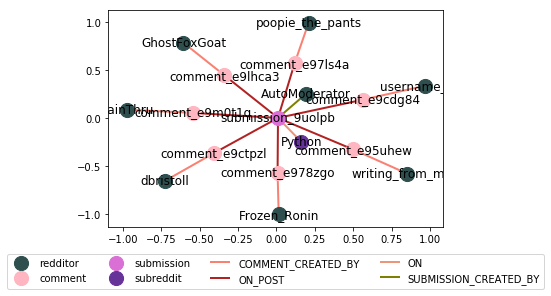

In [19]:
# Draw pandas graph
nx_pd_legend = exporter.draw_random(nx_pd_csv, options=options, legend=plt)

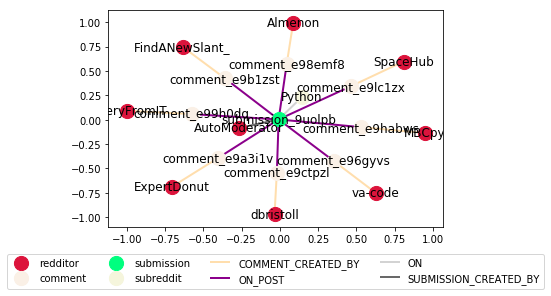

In [20]:
# Draw neo4j graph
nx_neo_legend = exporter.draw_random(nx_neo_csv, options=options, legend=plt)